In [1]:
%config Completer.use_jedi = False

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
plt.style.use('fivethirtyeight')
import plotly.figure_factory as ff

In [4]:
import plotly.offline as py

In [5]:
df = pd.read_csv('./datalab/Mall_Customers.csv')

In [6]:
dat = ff.create_table(df.head(3))
py.iplot(dat)

In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Text(0, 0.5, 'Count')

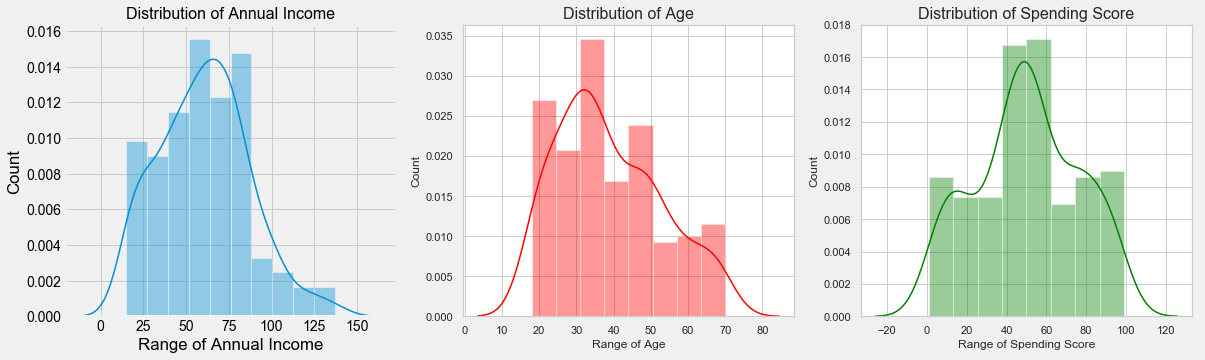

In [8]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (18, 5)

plt.subplot(1, 3, 1)
sns.set(style = 'whitegrid')
sns.distplot(df['Annual Income (k$)'])
plt.title('Distribution of Annual Income', fontsize = 16)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
sns.set(style = 'whitegrid')
sns.distplot(df['Age'], color='red')
plt.title('Distribution of Age', fontsize = 16)
plt.xlabel('Range of Age')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
sns.set(style = 'whitegrid')
sns.distplot(df['Spending Score (1-100)'], color='green')
plt.title('Distribution of Spending Score', fontsize = 16)
plt.xlabel('Range of Spending Score')
plt.ylabel('Count')

Here, In the above Plots we can see the Distribution pattern of Annual Income and Age, By looking at the plots,

we can infer one thing that There are few people who earn more than 100 US Dollars. Most of the people have an earning of around 50-75 US Dollars. Also, we can say that the least Income is around 20 US Dollars.

Taking inferences about the Customers.

The most regular customers for the Mall has age around 30-35 years of age. Whereas the the senior citizens age group is the least frequent visitor in the Mall. Youngsters are lesser in umber as compared to the Middle aged people.



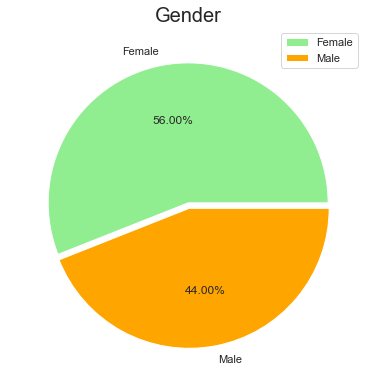

In [9]:
labels = ['Female', 'Male']
size = df['Gender'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.04]

plt.rcParams['figure.figsize'] = (6, 6)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = False, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
# plt.axis('off')
plt.legend()
plt.show()

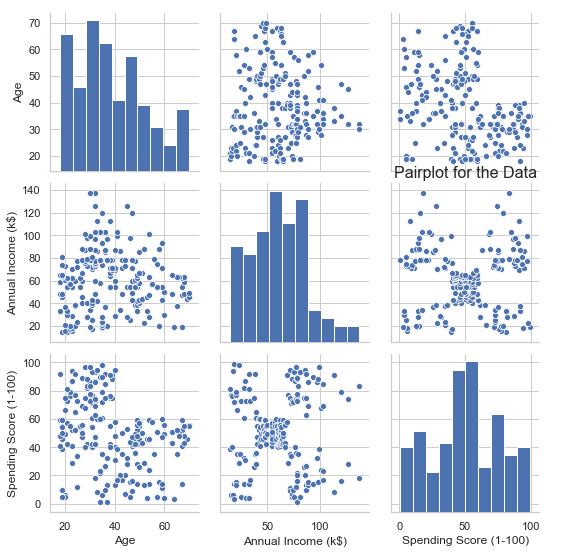

In [10]:
sns.pairplot(df[['Age','Annual Income (k$)','Spending Score (1-100)']])
plt.title('Pairplot for the Data', fontsize = 16)
plt.show()

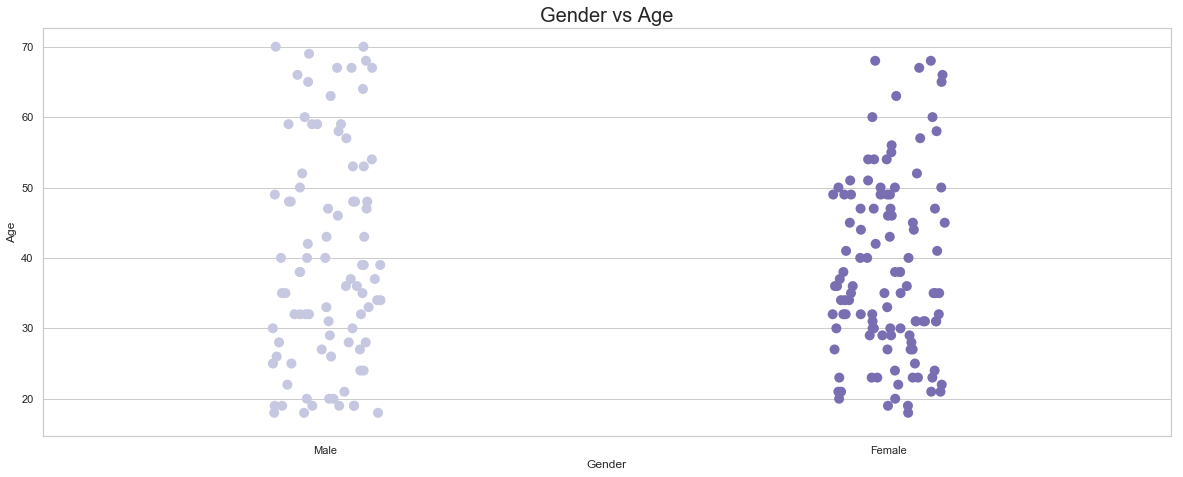

In [11]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.stripplot(df['Gender'], df['Age'], palette = 'Purples', size = 10)
plt.title('Gender vs Age', fontsize = 20)
plt.show()

## Clustering Analysis

In [12]:
X = df.iloc[:,[3,4]].values

In [13]:
X.shape

(200, 2)

## Kmeans Algorithm

The Elbow Method to find the No. of Optimal Clusters


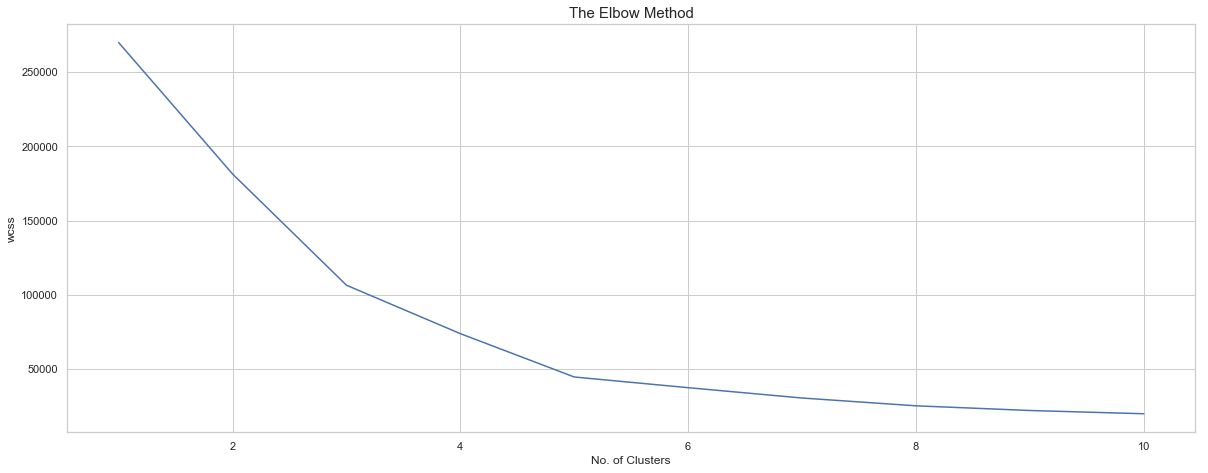

In [14]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(X)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 15)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [15]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(X)

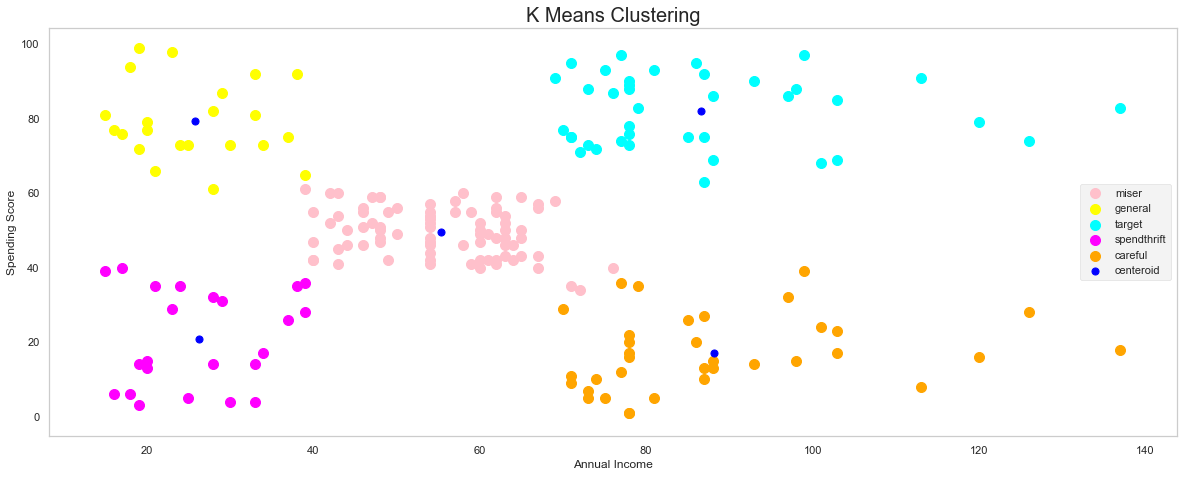

In [16]:
plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(X[y_means == 2, 0], X[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(X[y_means == 3, 0], X[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(X[y_means == 4, 0], X[y_means == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

## Cluster of customer Age vs Spending Score

In [17]:
X1 = df.iloc[:, [2,4]].values

In [18]:
X1.shape

(200, 2)

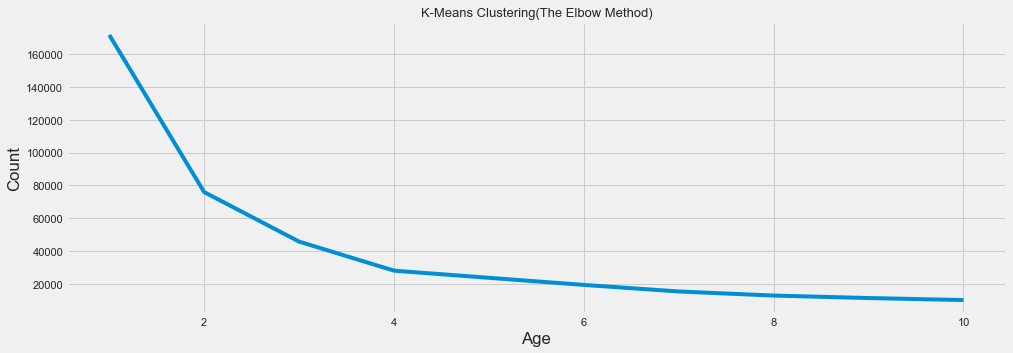

In [19]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (15, 5)
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 13)
plt.xlabel('Age')
plt.ylabel('Count')
# plt.grid()
plt.show()

In [20]:
km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(X1)

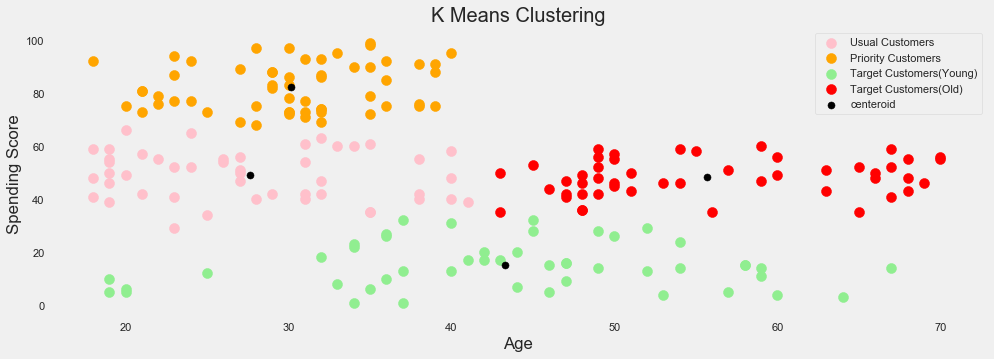

In [21]:
plt.scatter(X1[y_means == 0, 0], X1[y_means == 0, 1], s = 100, c = 'pink', label = 'Usual Customers')
plt.scatter(X1[y_means == 1, 0], X1[y_means == 1, 1], s = 100, c = 'orange', label = 'Priority Customers')
plt.scatter(X1[y_means == 2, 0], X1[y_means == 2, 1], s = 100, c = 'lightgreen', label = 'Target Customers(Young)')
plt.scatter(X1[y_means == 3, 0], X1[y_means == 3, 1], s = 100, c = 'red', label = 'Target Customers(Old)')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'black' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

In [22]:
X1[y_means == 3, 0], X1[y_means == 3, 1]

(array([65, 48, 50, 49, 59, 50, 47, 51, 69, 53, 70, 67, 54, 63, 43, 68, 70,
        47, 60, 60, 59, 45, 49, 57, 67, 46, 48, 55, 50, 68, 48, 47, 48, 49,
        67, 49, 66, 54, 68, 66, 65, 63, 49, 51, 50, 43, 48, 56],
       dtype=int64),
 array([35, 36, 55, 52, 60, 45, 41, 50, 46, 46, 56, 52, 59, 51, 50, 48, 55,
        42, 49, 56, 47, 53, 42, 51, 41, 44, 46, 58, 46, 55, 49, 47, 42, 48,
        59, 56, 50, 46, 43, 48, 52, 43, 59, 43, 57, 35, 36, 35],
       dtype=int64))

In [23]:
df1 = pd.read_csv('./datalab/weight-height/weight-height.csv')

In [49]:
dat = ff.create_table(df1.sample(frac=1).head(3))
py.iplot(dat)

Text(0, 0.5, 'Count')

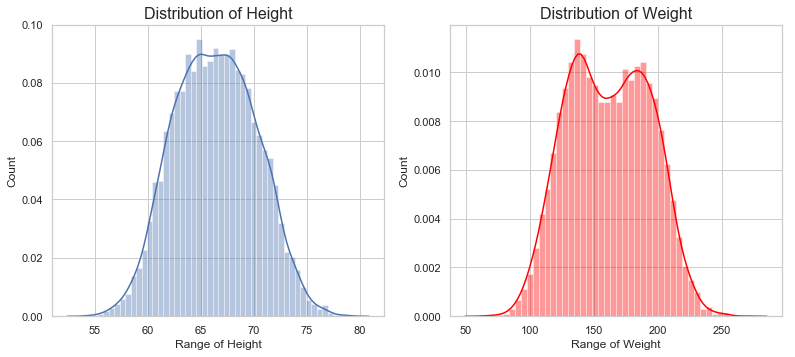

In [26]:
plt.rcParams['figure.figsize'] = (18, 5)

plt.subplot(1, 3, 1)
sns.set(style = 'whitegrid')
sns.distplot(df1['Height'])
plt.title('Distribution of Height', fontsize = 16)
plt.xlabel('Range of Height')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
sns.set(style = 'whitegrid')
sns.distplot(df1['Weight'], color='red')
plt.title('Distribution of Weight', fontsize = 16)
plt.xlabel('Range of Weight')
plt.ylabel('Count')

In [53]:
df1 = df1.sample(frac=1).reset_index(drop=True)
X2 = df1.iloc[:1500,[1,2]].values

In [54]:
X2

array([[ 66.60128332, 162.55743854],
       [ 66.68973599, 162.56540673],
       [ 73.03718383, 211.72085681],
       ...,
       [ 70.18876719, 192.86001995],
       [ 65.94966102, 155.85347561],
       [ 64.36248027, 149.45758737]])

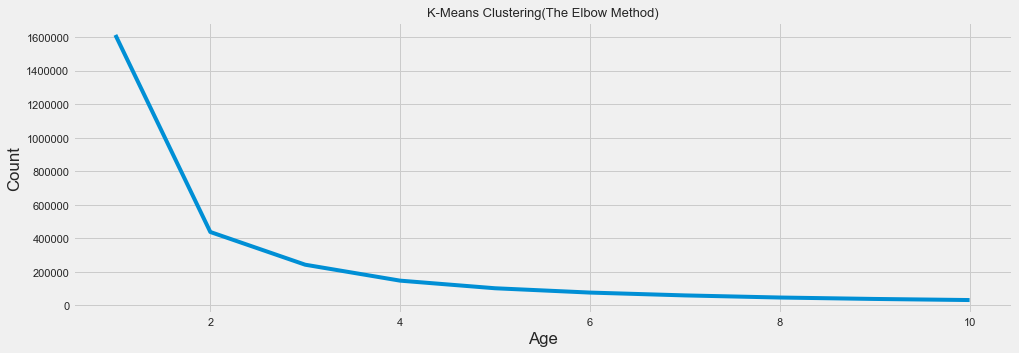

In [55]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (15, 5)
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 13)
plt.xlabel('Age')
plt.ylabel('Count')
# plt.grid()
plt.show()

In [61]:
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(X2)

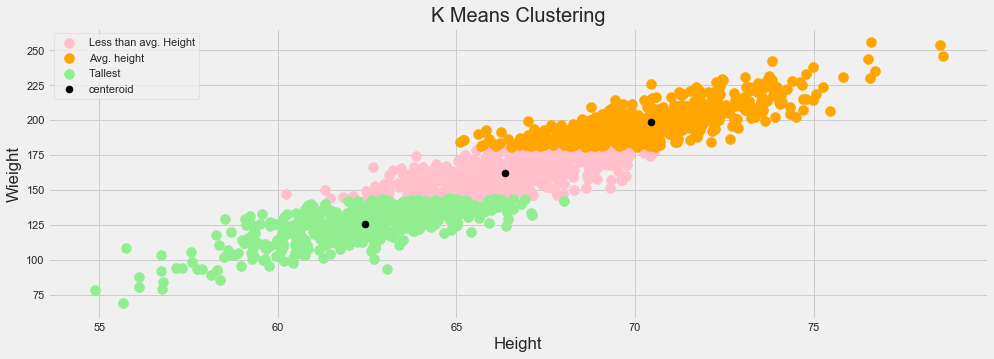

In [63]:
plt.scatter(X2[y_means == 0, 0], X2[y_means == 0, 1], s = 100, c = 'pink', label = 'Less than avg. Height')
plt.scatter(X2[y_means == 1, 0], X2[y_means == 1, 1], s = 100, c = 'orange', label = 'Avg. height')
plt.scatter(X2[y_means == 2, 0], X2[y_means == 2, 1], s = 100, c = 'lightgreen', label = 'Tallest')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'black' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Height')
plt.ylabel('Wieight')
plt.legend()
# plt.grid()
plt.show()

In [68]:
print("Male Mean Height: ")
df1[df1['Gender']== 'Male']['Height'].mean()
print("Male Mean Weight: ")
df1[df1['Gender']== 'Male']['Weight'].mean()

Male Mean Height: 
Male Mean Weight: 


187.0206206581932